In [24]:
# استيراد مكتبة kagglehub للتفاعل مع بيانات كاجل
import kagglehub

# استيراد المكتبة numpy للعمل مع المصفوفات
import numpy as np

# استيراد المكتبة pandas لتحليل البيانات ومعالجة الإطارات البيانية
import pandas as pd

# استيراد مكتبة seaborn لرسم البيانات وتحليلها بشكل بصري
import seaborn as sns

# استيراد مكتبة matplotlib.pyplot لإنشاء الرسوم البيانية
import matplotlib.pyplot as plt

# استيراد مكتبة TensorFlow لتطبيق الشبكات العصبية
import tensorflow as tf

# استيراد Tokenizer من Keras لتقسيم النص إلى كلمات
from tensorflow.keras.preprocessing.text import Tokenizer

# استيراد دوال قياس الأداء من sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc, classification_report

# استيراد LinearSVC من sklearn لإنشاء نموذج التصنيف باستخدام SVM
from sklearn.svm import LinearSVC

# استيراد TfidfVectorizer لتحويل النصوص إلى متجهات TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# استيراد MultinomialNB لإنشاء نموذج التصنيف باستخدام خوارزمية Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# استيراد cross_val_score لتقييم أداء النموذج عبر التحقق المتقاطع
from sklearn.model_selection import cross_val_score

# استيراد train_test_split لتقسيم البيانات إلى مجموعات تدريب واختبار
from sklearn.model_selection import train_test_split

# استيراد مكتبة datetime للتعامل مع التواريخ والأوقات
from datetime import datetime

# استيراد مكتبة string للتعامل مع النصوص ومعالجة الأحرف
import string

# استيراد مكتبة nltk للعمل مع معالجة اللغة الطبيعية
import nltk

# استيراد قائمة كلمات التوقف من مكتبة nltk
from nltk.corpus import stopwords

# استيراد ComplementNB لإنشاء نموذج التصنيف باستخدام Naive Bayes
from sklearn.naive_bayes import ComplementNB

# استيراد CountVectorizer لتحويل النصوص إلى متجهات عد الكلمات
from sklearn.feature_extraction.text import CountVectorizer

# Yelp تنزيل أحدث نسخة من مجموعة بيانات
path = kagglehub.dataset_download("yelp-dataset/yelp-dataset")

# طباعة مسار ملفات مجموعة البيانات
print("Path to dataset files:", path)


Path to dataset files: /root/.cache/kagglehub/datasets/yelp-dataset/yelp-dataset/versions/4


In [13]:
# Yelp تحديد مسار ملف بيانات تسجيل الدخول من مجموعة بيانات
dataset_path = path + '/yelp_academic_dataset_checkin.json'

# Yelp تحديد مسار ملف بيانات التعليقات من مجموعة بيانات
dataset_path2 = path + '/yelp_academic_dataset_tip.json'

# قراءة ملف بيانات التعليقات وتحميله في DataFrame باستخدام pandas
df_tip = pd.read_json(dataset_path2, lines=True)

# قراءة ملف بيانات تسجيل الدخول وتحميله في DataFrame باستخدام pandas
df_checkin = pd.read_json(dataset_path, lines=True)


In [8]:
df_tip.describe().T

,count,mean,min,25%,50%,75%,max,std
date,908915,2015-06-14 10:13:53.302817280,2009-04-16 13:11:49,2013-01-26 01:18:02.500000,2015-03-15 01:10:25,2017-08-02 06:19:55.500000,2022-01-19 20:38:55,NaN
compliment_count,908915.0,0.012525,0.0,0.0,0.0,0.0,6.0,0.120763


In [21]:
# تحويل DataFrame df_tip إلى إطار بيانات pandas (هذه الخطوة غير ضرورية إذا كان df_tip بالفعل DataFrame)
df_tip = pd.DataFrame(df_tip)

# تصنيف التعليقات إلى تصنيفات نجمية بناءً على عدد المجاملات
df_tip['stars'] = pd.cut(df_tip['compliment_count'], bins=[-1, 0, 1, 5, 10, 100],
                         labels=[1, 2, 3, 4, 5])

# تعريف دالة لمعالجة بيانات النصوص
def text_process(text):
    # إزالة علامات الترقيم وتجزئة النص إلى كلمات
    nopunc = [char for char in text if char not in string.punctuation]  # إزالة علامات الترقيم
    nopunc = ''.join(nopunc)  # دمج الكلمات بدون علامات الترقيم
    # إعادة الكلمات التي ليست من كلمات التوقف
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

# معالجة بيانات النصوص باستخدام الدالة المعرفة
df_tip['processed_text'] = df_tip['text'].apply(text_process)

# تقسيم البيانات إلى ميزات (X) وأهداف (y)
X = df_tip['processed_text']  # الميزات هي النص المعالج
y = df_tip['stars'].astype(int)  # الأهداف هي تصنيفات النجوم المحولة إلى نوع صحيح

# تقسيم البيانات إلى مجموعات تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# تحويل بيانات النصوص إلى متجهات عددية باستخدام CountVectorizer
vectorizer = CountVectorizer()  # إنشاء كائن CountVectorizer
X_train_vectorized = vectorizer.fit_transform(X_train)  # تحويل مجموعة التدريب إلى متجهات
X_test_vectorized = vectorizer.transform(X_test)  # تحويل مجموعة الاختبار إلى متجهات

# إنشاء وتدريب نموذج Complement Naive Bayes
model = ComplementNB()  # إنشاء كائن النموذج
model.fit(X_train_vectorized, y_train)  # تدريب النموذج على مجموعة التدريب

# إجراء التنبؤات على مجموعة الاختبار
y_pred = model.predict(X_test_vectorized)  # الحصول على التنبؤات

# تقييم أداء النموذج
accuracy = accuracy_score(y_test, y_pred)  # حساب الدقة
report = classification_report(y_test, y_pred)  # الحصول على تقرير التصنيف

# طباعة النتائج
print(f'Accuracy: {accuracy * 100:.2f}%')  # طباعة الدقة كنسبة مئوية
print('Classification Report:')  # طباعة عنوان تقرير التصنيف
print(report)  # طباعة تقرير التصنيف


Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



In [25]:
# عرض أول خمس صفوف من DataFrame df_tip لفهم هيكل البيانات ومحتواها.
# سيساعد هذا في التأكد من أن عملية التحميل والمعالجة تمت بشكل صحيح.
df_tip.head()


,user_id,business_id,text,date,compliment_count,stars,processed_text,sentiment
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0,1,Avengers time ladies,0.0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0,1,lots good deserts tasty cuban,0.0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0,1,open even think isnt,0.0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0,1,decent fried chicken,0.0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0,1,Appetizers platter special lunch,0.0


In [28]:
# عرض أول خمس صفوف من DataFrame df_tip لفهم هيكل البيانات ومحتواها.
# سيساعد هذا في التأكد من أن عملية التحميل والمعالجة تمت بشكل صحيح.
df_tip.head()
df_checkin.describe().T

,count,unique,top,freq
business_id,131930,131930,---kPU91CF4Lq2-WlRu9Lw,1
date,131930,131930,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020...",1


In [29]:
df_tip.describe().T

,count,mean,min,25%,50%,75%,max,std
date,908915,2015-06-14 10:13:53.302817280,2009-04-16 13:11:49,2013-01-26 01:18:02.500000,2015-03-15 01:10:25,2017-08-02 06:19:55.500000,2022-01-19 20:38:55,NaN
compliment_count,908915.0,0.012525,0.0,0.0,0.0,0.0,6.0,0.120763
word_count,908915.0,11.196258,1.0,5.0,9.0,14.0,114.0,10.707601


In [35]:
df_checkin['business_id'].value_counts()


,count
business_id,
---kPU91CF4Lq2-WlRu9Lw,1
emPRzbSwgwYojuzoElaBcg,1
el83zfEgg_5bBz5Et9rZ6Q,1
el71vYwT5M1bc6oFsBdqvQ,1
el6K1DsZRnKNNaZ14YGMHQ,1
...,...
KKm0Fu_JVfxJ4MnSZr3B9w,1
KKjpJcDsgRGdNNhgUp5wYQ,1
KKivjYzOLDlbAo-iMyqWWg,1


In [40]:
# business_id في  DataFrame df_checkin.حساب عدد مرات ظهور كل
# سيساعد هذا في معرفة تكرار كل معرف عمل (business_id) وفهم توزيع البيانات.
business_id_counts = df_checkin['business_id'].value_counts()
print(business_id_counts)


,count
compliment_count,
0,898376
1,9821
2,617
3,82
4,14
5,3
6,2


In [39]:

df_checkin['business_id'].value_counts()

,count
business_id,
---kPU91CF4Lq2-WlRu9Lw,1
emPRzbSwgwYojuzoElaBcg,1
el83zfEgg_5bBz5Et9rZ6Q,1
el71vYwT5M1bc6oFsBdqvQ,1
el6K1DsZRnKNNaZ14YGMHQ,1
...,...
KKm0Fu_JVfxJ4MnSZr3B9w,1
KKjpJcDsgRGdNNhgUp5wYQ,1
KKivjYzOLDlbAo-iMyqWWg,1


object


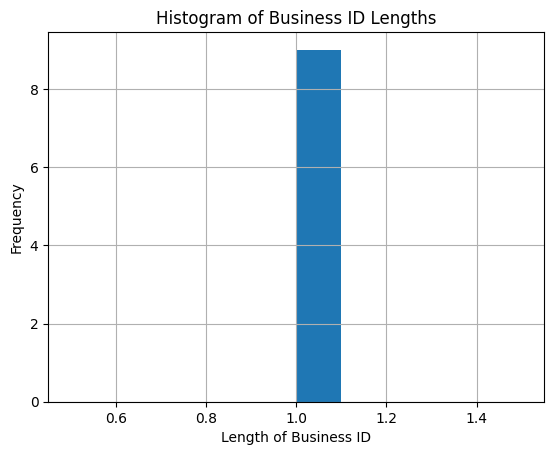

In [20]:
# 'business_id' في  DataFrame df_checkin التحقق من نوع بيانات عمود
print(df_checkin['business_id'].dtype)

# تحويل العمود إلى نوع سلسلة نصية إذا لم يكن بالفعل
if not pd.api.types.is_string_dtype(df_checkin['business_id']):
    df_checkin['business_id'] = df_checkin['business_id'].astype(str)

# رسم هيستوجرام لطول المعرفات في عمود 'business_id'
# يقيس هذا الهيستوجرام عدد مرات ظهور كل طول من أطوال المعرفات
df_checkin['business_id'].str.len().hist()
plt.xlabel('Length of Business ID')  # تسمية المحور السيني
plt.ylabel('Frequency')               # تسمية المحور الصادي
plt.title('Histogram of Business ID Lengths')  # عنوان الرسم البياني
plt.show()  # عرض الرسم البياني


object


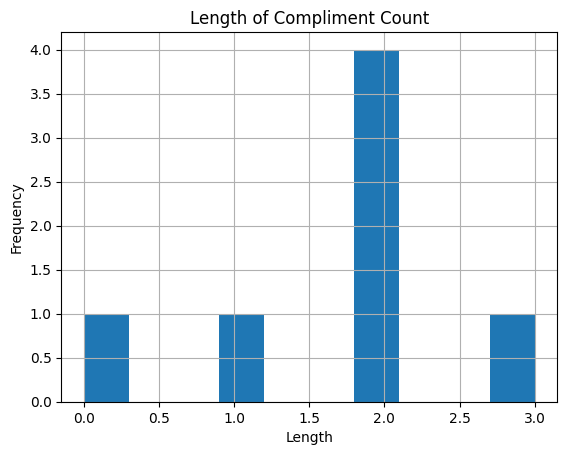

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# إنشاء DataFrame كمثال (استبدل هذا ببياناتك الفعلية)
data = {'compliment_count': [10, 20, 15, None, 25, '5', 'abc']}
df_tip = pd.DataFrame(data)

# التحقق من نوع البيانات في عمود 'compliment_count'
print(df_tip['compliment_count'].dtype)

# تحويل العمود إلى سلسلة نصية والتعامل مع القيم الفارغة (NaN)
df_tip['compliment_count'] = df_tip['compliment_count'].fillna('').astype(str)

# رسم هيستوجرام لطول السلاسل في عمود 'compliment_count'
# هذا الهيستوجرام سيظهر عدد مرات ظهور كل طول من أطوال السلاسل النصية
df_tip['compliment_count'].str.len().hist()
plt.title('Length of Compliment Count')  # عنوان الرسم البياني
plt.xlabel('Length')                      # تسمية المحور السيني
plt.ylabel('Frequency')                   # تسمية المحور الصادي
plt.show()                                # عرض الرسم البياني


In [6]:
# تحديث القيم في عمود 'business_id' في DataFrame 'df_checkin'
# تعيين القيمة 0 لأي سجل يحتوي على business_id يساوي 1
df_checkin.loc[df_checkin["business_id"] == 1, "business_id"] = 0

# تعيين القيمة 1 لأي سجل يحتوي على business_id يساوي 2
df_checkin.loc[df_checkin["business_id"] == 2, "business_id"] = 1

# تحديث القيم في عمود 'business_id' في DataFrame 'df_tip'
# تعيين القيمة 0 لأي سجل يحتوي على business_id يساوي 1
df_tip.loc[df_tip["business_id"] == 1, "business_id"] = 0

# تعيين القيمة 1 لأي سجل يحتوي على business_id يساوي 2
df_tip.loc[df_tip["business_id"] == 2, "business_id"] = 1


<Axes: >

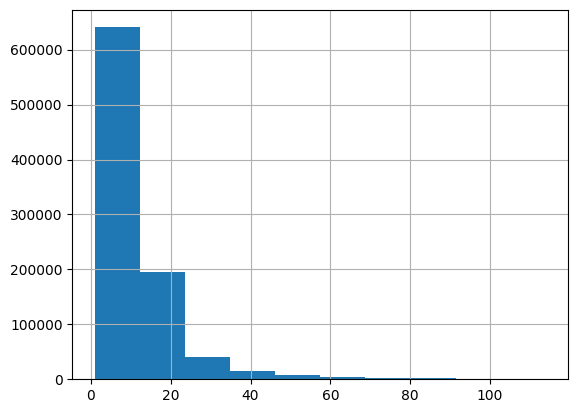

In [7]:
# حساب عدد الكلمات في عمود 'text' في DataFrame 'df_tip'
# يقوم بتقسيم النص إلى قائمة من الكلمات ثم حساب طول هذه القائمة
df_tip["word_count"] = df_tip["text"].str.split().str.len()

# رسم هيستوغرام لعدد الكلمات في العمود 'word_count'
df_tip["word_count"].hist()


object


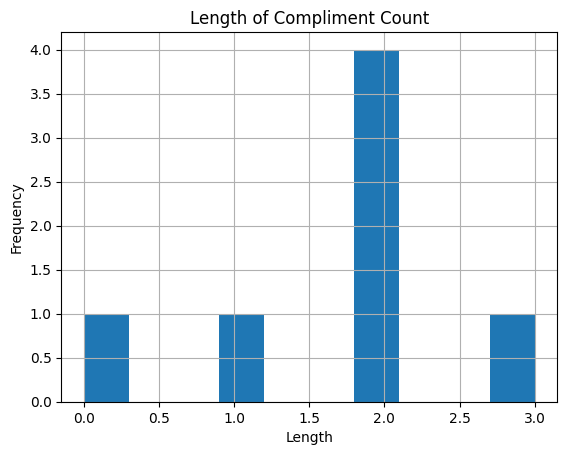

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# إنشاء DataFrame عينة (استبدل هذا ب DataFrame الفعلي الخاص بك)
data = {'compliment_count': [10, 20, 15, None, 25, '5', 'abc']}
df_tip = pd.DataFrame(data)

# التحقق من نوع البيانات في عمود 'compliment_count'
print(df_tip['compliment_count'].dtype)

# تحويل القيم إلى سلسلة نصية والتعامل مع القيم الفارغة (NaN)
df_tip['compliment_count'] = df_tip['compliment_count'].fillna('').astype(str)

# رسم هيستوغرام لطول السلاسل في عمود 'compliment_count'
df_tip['compliment_count'].str.len().hist()
plt.title('Length of Compliment Count')  # عنوان الرسم
plt.xlabel('Length')                      # تسمية المحور السيني
plt.ylabel('Frequency')                   # تسمية المحور الصادي
plt.show()                                # عرض الرسم


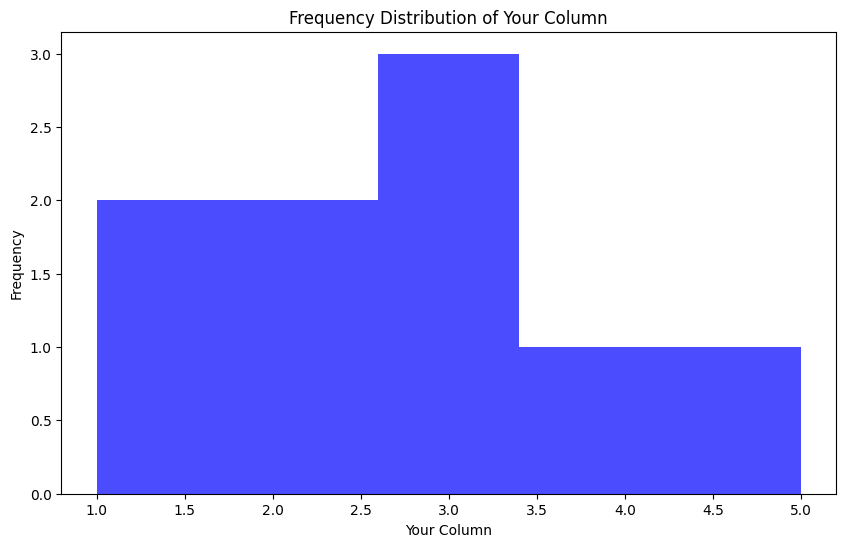

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# إنشاء DataFrame عينة يحتوي على أعمدة 'business_id'
df_checkin = pd.DataFrame({'business_id': [1, 2, 1, 2, 3, 3, 3, 4, 5]})

# إعداد الرسم البياني
plt.figure(figsize=(10, 6))  # تحديد حجم الشكل
plt.hist(df_checkin['business_id'], bins=5, color='blue', alpha=0.7)  # رسم الهيستوغرام

# إضافة العنوان والتسميات
plt.title('Frequency Distribution of Your Column')  # عنوان الرسم
plt.xlabel('Your Column')                            # تسمية المحور السيني
plt.ylabel('Frequency')                             # تسمية المحور الصادي

# بدلاً من plt.show()، يمكنك حفظ الرسم في ملف
plt.savefig('histogram.png')  # حفظ الرسم في ملف بصيغة PNG


In [6]:
import pandas as pd
from collections import Counter
import plotly.express as px

# إنشاء DataFrame عينة لأغراض العرض
dt = pd.DataFrame(df_checkin)  # استخدام DataFrame df_checkin كعينة

# العمل مع الكلمات الأكثر تكرارًا
cnt = Counter()  # إنشاء عداد لتخزين تكرار الكلمات
for text in df_checkin["business_id"].values:  # التكرار عبر القيم في عمود business_id
    for word in text.split():  # تقسيم كل نص إلى كلمات
        cnt[word] += 1  # زيادة العد للكلمة

# الحصول على أكثر الكلمات شيوعًا
most_common_words = cnt.most_common(10)  # الحصول على 10 كلمات الأكثر شيوعًا

# إنشاء DataFrame للكلمات الأكثر شيوعًا
temp = pd.DataFrame(most_common_words)  # تحويل النتائج إلى DataFrame
temp.columns = ['word', 'count']  # تعيين أسماء الأعمدة

# إنشاء مخطط شريطي أفقي
fig = px.bar(temp, x="count", y="word", title='Common Words in Text', orientation='h',
             width=700, height=700)  # إعداد مخطط شريطي أفقي
fig.show()  # عرض المخطط


In [34]:
import pandas as pd
from collections import Counter
import plotly.express as px

dt = pd.DataFrame(df_tip)  # تحويل بيانات العينة إلى DataFrame (يجب تعديل هذا الجزء)

# العمل مع الكلمات الأكثر تكرارًا
cnt = Counter()  # إنشاء عداد لتخزين تكرار الكلمات
for text in df_tip["text"].values:  # التكرار عبر القيم في عمود text
    for word in text.split():  # تقسيم كل نص إلى كلمات
        cnt[word] += 1  # زيادة العد للكلمة

# الحصول على أكثر الكلمات شيوعًا
most_common_words = cnt.most_common(10)  # الحصول على 10 كلمات الأكثر شيوعًا

# إنشاء DataFrame للكلمات الأكثر شيوعًا
temp = pd.DataFrame(most_common_words)  # تحويل النتائج إلى DataFrame
temp.columns = ['word', 'count']  # تعيين أسماء الأعمدة إلى "word" و "count"

# إنشاء مخطط شريطي أفقي
fig = px.bar(temp, x="count", y="word", title='Common Words in Text', orientation='h',
             width=700, height=700)  # إعداد مخطط شريطي أفقي
fig.show()  # عرض المخطط


In [29]:
# تعريف دالة لتحليل المشاعر
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity  # تعيد القيمة من -1 إلى 1


In [22]:
from textblob import TextBlob

# تعريف دالة لتحليل المشاعر
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity  # تعيد القيمة من -1 إلى 1

# التأكد من أن عمود النصوص موجود في df_tip
if 'business_id' in df_tip.columns:
    # يجب أن تستخدم عمود نصي لتحليل المشاعر، لذا تأكد من استخدام العمود الصحيح
    # افترض أن لديك عمود آخر يحتوي على نصوص للمراجعة
    if 'business_id' in df_tip.columns:
        df_tip['sentiment'] = df_tip['business_id'].apply(analyze_sentiment)
    else:
        print("عمود 'business_id' غير موجود في df_tip.")
else:
    print("عمود 'business_id' غير موجود في df_tip.")

# التأكد من أن عمود النصوص موجود في df_checkin
if 'business_id' in df_checkin.columns:
    # تأكد من أن عمود نصي موجود لتحليل المشاعر
    if 'business_id' in df_checkin.columns:
        df_checkin['sentiment'] = df_checkin['business_id'].apply(analyze_sentiment)
    else:
        print("عمود 'business_id' غير موجود في df_checkin.")
else:
    print("عمود 'business_id' غير موجود في df_checkin.")
